### Peerloankart is an NBFC which facilitates peer-to-peer loans. It connects people who need to borrow(borrowers) with people who have money(investors).As an investor,you would want to invest in people who showed a profile of having a high probability of paying you back. Create a model which will help you predict whether a borrower will repay back the loan.

* FICO:fico(credit score) score
* credit.policy: if the customer meets the criteria for credit underwriting as specified by FICO(Credit rating org)
* purpose: The purpose of taking a loan
* not.fully.paid: The DV,1 implies the borrower has not repaid back the previous loan,0-paid back the previous loan.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
loans=pd.read_csv('loanborowwerdata.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
dataset=loans.filter(['credit.policy','fico','purpose','not.fully.paid'])
dataset.head()


,credit.policy,fico,purpose,not.fully.paid
0,1,737,debt_consolidation,0
1,1,707,credit_card,0
2,1,682,debt_consolidation,0
3,1,712,debt_consolidation,0
4,1,667,credit_card,0


In [4]:
dataset.shape

(9578, 4)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   credit.policy   9578 non-null   int64 
 1   fico            9578 non-null   int64 
 2   purpose         9578 non-null   object
 3   not.fully.paid  9578 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 299.4+ KB


In [6]:
dataset.isnull().sum()

credit.policy     0
fico              0
purpose           0
not.fully.paid    0
dtype: int64

In [7]:
dataset.purpose.value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [8]:
dataset['credit.policy'].value_counts()

credit.policy
1    7710
0    1868
Name: count, dtype: int64

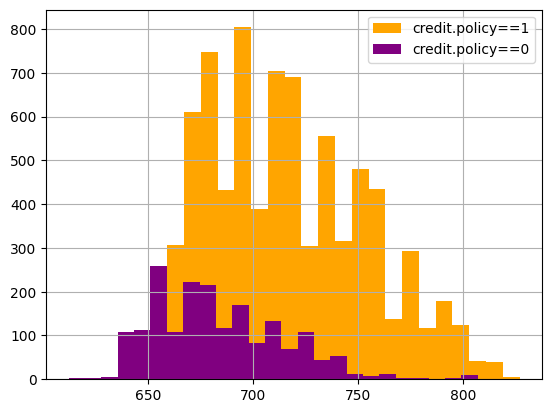

In [9]:
# Are satisfying the rules laid down by fico directly impacting the credit scores?
dataset[dataset['credit.policy']==1]['fico'].hist(color='orange',bins=25,label='credit.policy==1')
dataset[dataset['credit.policy']==0]['fico'].hist(color='purple',bins=25,label='credit.policy==0')
plt.legend()
plt.show()

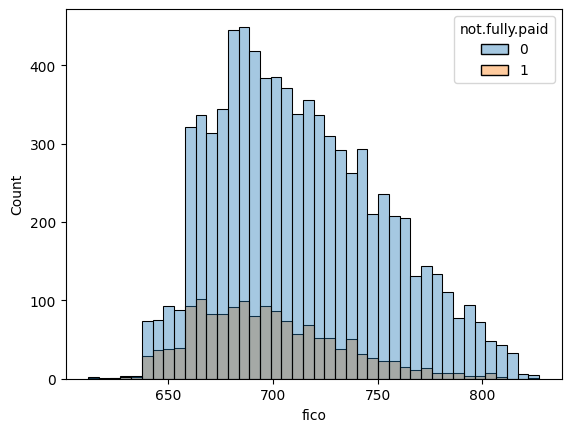

In [10]:
### do people who have paid back their previous loans get a better credit score?
sns.histplot(data=dataset,
            x='fico',
            hue='not.fully.paid',
             alpha=0.4)
plt.show()

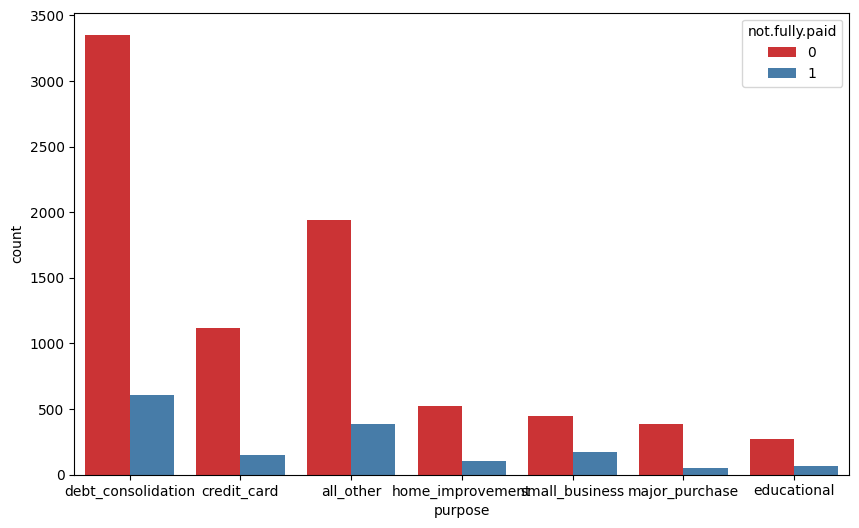

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=dataset,palette='Set1')
plt.show()

In [12]:
categorical_variable=['purpose']

In [13]:
data=pd.get_dummies(dataset,columns=categorical_variable,drop_first=True,dtype=int)
data.head()

,credit.policy,fico,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,737,0,0,1,0,0,0,0
1,1,707,0,1,0,0,0,0,0
2,1,682,0,0,1,0,0,0,0
3,1,712,0,0,1,0,0,0,0
4,1,667,0,1,0,0,0,0,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   credit.policy               9578 non-null   int64
 1   fico                        9578 non-null   int64
 2   not.fully.paid              9578 non-null   int64
 3   purpose_credit_card         9578 non-null   int64
 4   purpose_debt_consolidation  9578 non-null   int64
 5   purpose_educational         9578 non-null   int64
 6   purpose_home_improvement    9578 non-null   int64
 7   purpose_major_purchase      9578 non-null   int64
 8   purpose_small_business      9578 non-null   int64
dtypes: int64(9)
memory usage: 673.6 KB


In [15]:
X=data.drop('not.fully.paid',axis=1)
y=data['not.fully.paid']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=0)

In [17]:
#decision tree classifier:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
pred_tree=tree_model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [20]:
accuracy=accuracy_score(y_test,pred_tree)
accuracy

0.8326374391092554

In [21]:
cm=confusion_matrix(y_test,pred_tree)
cm

array([[2383,   23],
       [ 458,   10]])

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200) #n_estimators=hyperparameter
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [23]:
pred_rfc=rfc.predict(X_test)

In [24]:
accuracy=accuracy_score(y_test,pred_rfc)
accuracy

0.8319415448851775

In [25]:
rfc.feature_importances_  #feature_importances_-parameter

array([0.16290504, 0.70104744, 0.02904889, 0.0178873 , 0.01507756,
       0.01726602, 0.01616256, 0.0406052 ])

In [26]:
X.columns

Index(['credit.policy', 'fico', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

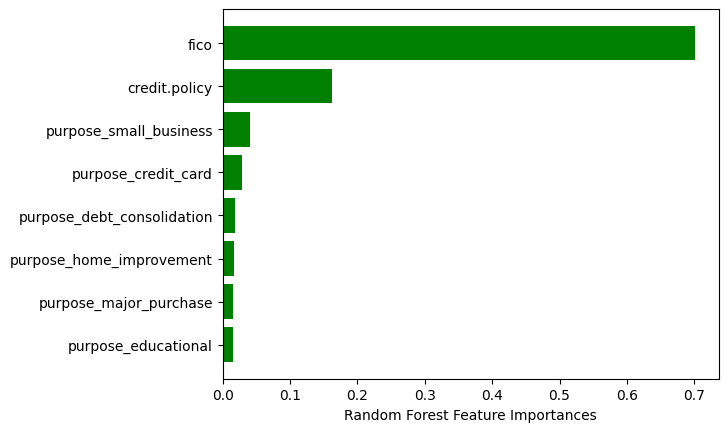

In [27]:
sorted_index=rfc.feature_importances_.argsort()
plt.barh(X.columns[sorted_index],rfc.feature_importances_[sorted_index],color='g',align='center')
plt.xlabel('Random Forest Feature Importances')
plt.show()

In [28]:
print('Parameters in use:\n')
print(rfc.get_params())

Parameters in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [29]:
#The predefined set of values:
n_estimators=[50,100,150,200]
max_features=[0.3,0.6,1]
max_depth=[3,5,7,8]
max_samples=[0.5,1,0.8,1.8]


In [30]:
param_grid={'n_estimators':n_estimators,
           'max_features':max_features,
           'max_samples':max_samples,
           'max_depth':max_depth}
print(param_grid)

{'n_estimators': [50, 100, 150, 200], 'max_features': [0.3, 0.6, 1], 'max_samples': [0.5, 1, 0.8, 1.8], 'max_depth': [3, 5, 7, 8]}


In [31]:
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=rfc,
                    param_grid=param_grid,
                    cv=5,
                    n_jobs=-1)

In [32]:
import warnings
warnings.filterwarnings('ignore')
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=200),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 8],
                         'max_features': [0.3, 0.6, 1],
                         'max_samples': [0.5, 1, 0.8, 1.8],
                         'n_estimators': [50, 100, 150, 200]})

In [33]:
rf_grid.best_params_

{'max_depth': 5, 'max_features': 0.3, 'max_samples': 0.8, 'n_estimators': 50}

In [34]:
rf_grid.best_score_

np.float64(0.8412887464244772)

In [35]:
from sklearn.model_selection import RandomizedSearchCV
rfc_grid1=RandomizedSearchCV(estimator=rfc,param_distributions=param_grid,cv=10,n_jobs=-1)

In [36]:
rfc_grid1.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=200),
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7, 8],
                                        'max_features': [0.3, 0.6, 1],
                                        'max_samples': [0.5, 1, 0.8, 1.8],
                                        'n_estimators': [50, 100, 150, 200]})

In [37]:
rfc_grid1.best_params_

{'n_estimators': 150, 'max_samples': 1, 'max_features': 1, 'max_depth': 8}

In [38]:
rfc_grid1.best_score_

np.float64(0.8411399782013923)